In [1]:
d = {'gender':'male','cost':30}

In [3]:
b = {'person':d}

In [5]:
b

{'person': {'cost': 30, 'gender': 'male'}}

In [1]:
import os

In [2]:
### What we want to do

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
file = pd.read_table('output.txt', header=None)

In [8]:
file.columns = ['id','group','value']

In [9]:
file['value'].sum()

28.685194000000003

In [10]:
file['value'].std()

0.3068102709590819

In [11]:
file['value'].describe()

count    50.000000
mean      0.573704
std       0.306810
min       0.005636
25%       0.281738
50%       0.661441
75%       0.848107
max       0.987802
Name: value, dtype: float64

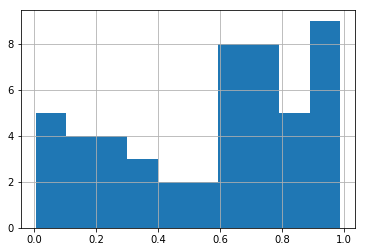

In [12]:
file['value'].hist()

In [13]:
## Here we go!

In [14]:
from mrjob.job import MRJob, MRStep

In [34]:
class Sum_stats(MRJob):
    def mapper(self, _, line):
        value = float(line.split('\t')[2])
        yield ("sum", value)
    def combiner(self, key, counts):
        if key == "sum":
            yield ("sum", sum(counts))
    def reducer(self, key, counts):
        if key == "sum":
            total = 0
            for i,c in enumerate(counts):
                total += c
            yield ("sum", total)
            yield ("count", i+1)

In [32]:
Sum_stats.run('output.txt')

TypeError: run() takes 1 positional argument but 2 were given

In [63]:
# Plots

In [37]:
files = [file for file in os.listdir('./cores') if file.endswith('.txt')]

In [38]:
def import_extract_time(file):
    text = pd.read_table(file, header=None, names=['metric','value'])
    if float(text[text['metric']=='real']['value'].values[0][0]) == 0:
        return float(text[text['metric']=='real']['value'].values[0][2:-1])
    else:
        return float(text[text['metric']=='real']['value'].values[0][0]) * 60 + float(text[text['metric']=='real']['value'].values[0][2:-1])

In [39]:
times = [import_extract_time("./cores/"+str(file)) for file in files]

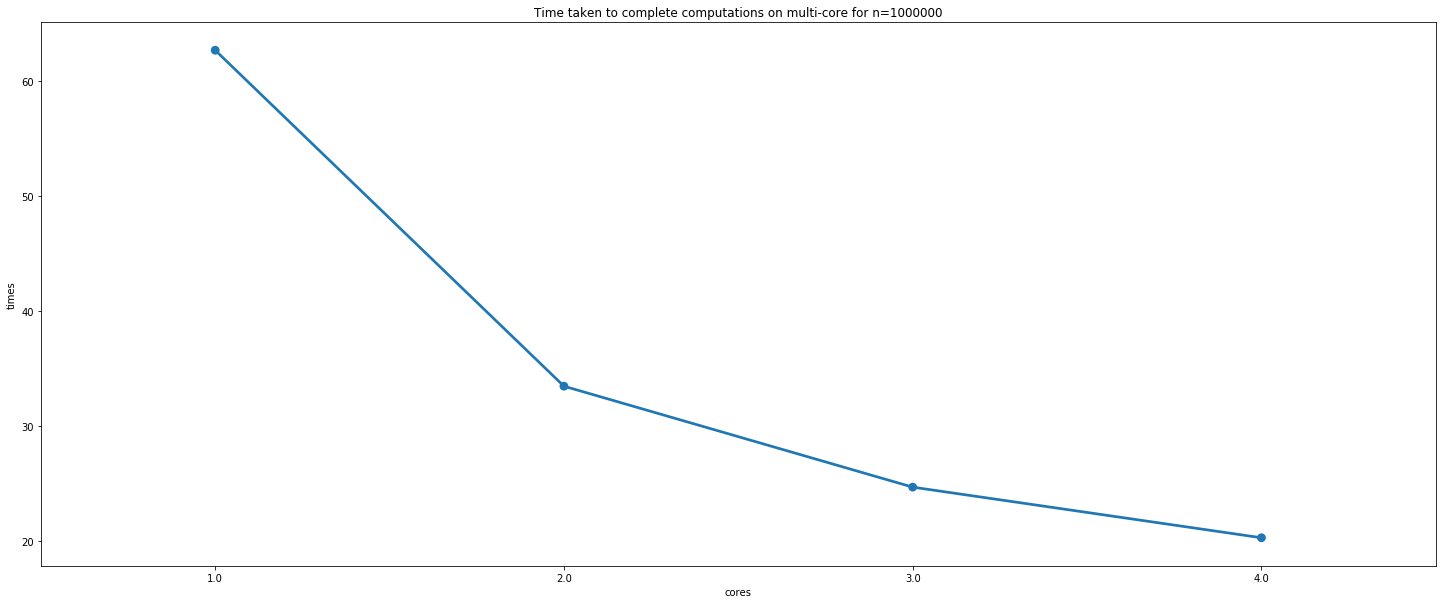

In [40]:
plt.figure(figsize=(25,10))
plt.title("Time taken to complete computations on multi-core for n=1000000")
plt.xlabel('Number of cores')
plt.ylabel('Running time (in seconds)')
df = pd.DataFrame(np.column_stack([[int(file[0]) for file in files], times]), columns=['cores','times'])
sns.pointplot(data=df, x='cores', y='times')

In [23]:
files = [file for file in os.listdir('./small_n') if file.endswith('.txt')]

In [24]:
times = [import_extract_time("./small_n/"+str(file)) for file in files]

In [25]:
endings = [int(file.replace('.txt','')[-2:]) for file in files]

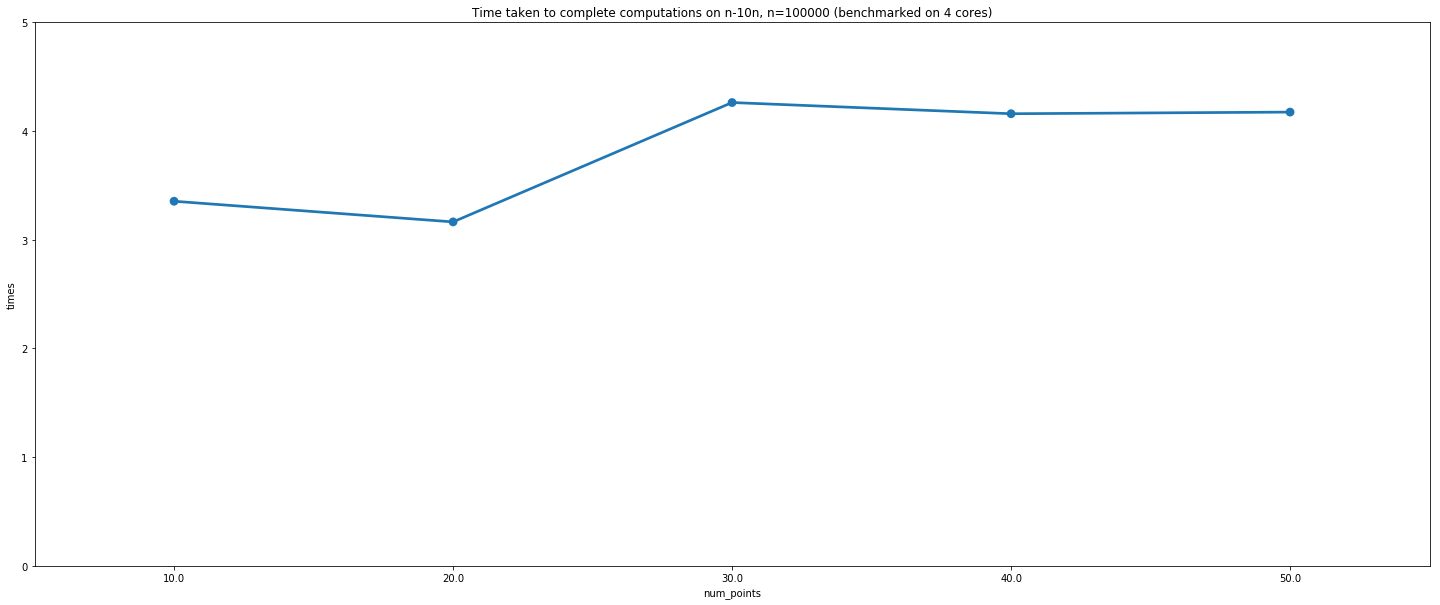

In [26]:
plt.figure(figsize=(25,10))
plt.title("Time taken to complete computations on n-10n, n=100000 (benchmarked on 4 cores)")
plt.xlabel('Number of data points')
plt.ylabel('Running time')
plt.ylim(0,5)
df = pd.DataFrame(np.column_stack([endings, times]), columns=['num_points','times'])
sns.pointplot(data=df, x='num_points', y='times')

In [28]:
files = [file for file in os.listdir('./n') if file.endswith('.txt')]

In [29]:
files.sort()

In [30]:
times = {}

In [31]:
for i in range(1,5):
    times[i] = [import_extract_time("./n/"+str(file)) for file in files if file.startswith(str(i))]

In [32]:
times

{1: [11.931,
  17.025,
  22.592,
  27.983,
  33.533,
  38.988,
  44.482,
  50.297,
  55.071,
  61.56],
 2: [7.778,
  10.484,
  13.27,
  16.082,
  19.168,
  21.862,
  24.651,
  27.588,
  29.821,
  32.608],
 3: [6.347,
  8.215,
  10.357,
  12.348,
  14.335,
  16.488,
  18.686,
  20.677,
  22.69,
  24.532],
 4: [6.105,
  7.395,
  9.002,
  10.416,
  12.208,
  13.659,
  15.286,
  16.954,
  18.47,
  20.618]}

In [33]:
import seaborn as sns

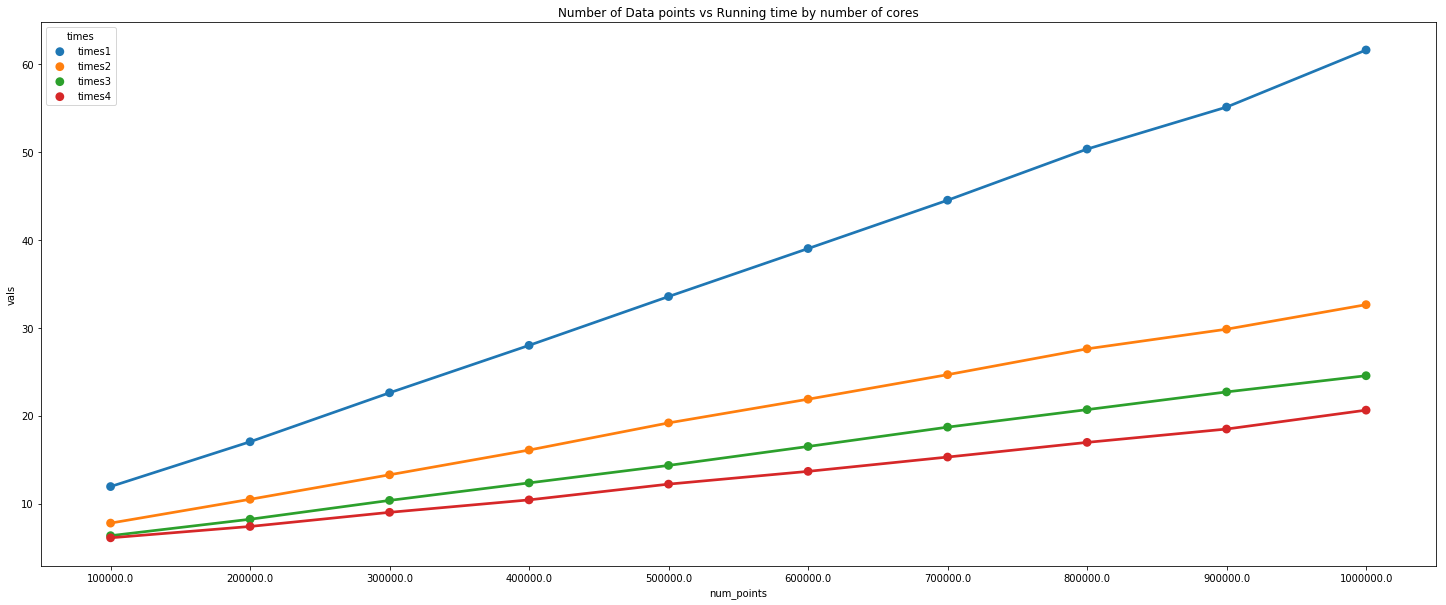

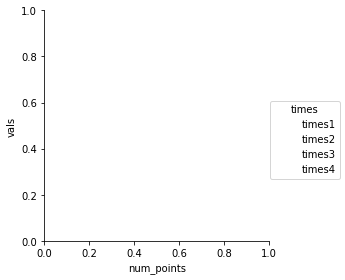

In [36]:
points = [int(100000*(i+1)) for i in range(10)]
df = pd.DataFrame(np.column_stack([points, times[1], times[2], times[3], times[4]]), 
                  columns=['num_points','times1', 'times2', 'times3', 'times4'])
df = df.melt('num_points', var_name='times', value_name='vals')

#plt.figure(figsize=(25,10))
#plt.title("Time taken to complete computations on n-10n, n=100000 (benchmarked on 4 cores)")
#plt.xlabel('Number of data points')
#plt.ylabel('Running time')
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plt.title('Number of Data points vs Running time by number of cores')
sns.factorplot(data=df, x='num_points', y='vals', hue='times', ax=ax)



In [167]:
a = set([1,2,3,4])

In [168]:
1 in a

True

In [171]:
test = pd.read_table('output_20000.data', header=None)

In [177]:
test.groupby(1).describe()

0                                                                 \
     count          mean          std     min      25%      50%       75%   
1                                                                           
0     98.0   9914.132653  5855.288699    71.0  5049.50  10303.0  14368.00   
1    104.0  10384.442308  5591.331597    38.0  5226.75  11191.5  14866.00   
2    104.0   9386.538462  5069.299478   225.0  5709.75   9109.5  12919.25   
3     86.0   9079.511628  6008.671643     0.0  3324.50   8612.5  14804.75   
4     89.0  10675.662921  5664.215714   675.0  5621.00  10407.0  16306.00   
5     89.0   8813.235955  5701.836451   114.0  3702.00   8122.0  13099.00   
6    105.0   9359.838095  5333.654380   175.0  5292.00   8875.0  13752.00   
7     92.0  10245.847826  5806.483500   321.0  5574.75  10374.5  15619.50   
8    108.0  11629.101852  5794.669042   609.0  6870.50  12367.5  16909.50   
9    102.0  10484.460784  5692.380399   212.0  5984.50   9916.5  16335.25   
10    91.0   9115.417582  5204.193717    35.0  3894.50   9766.0  13306.50   
11    99.0   9626.717172  5779.777492   117.0  4671.00  10544.0  13135.00   
12    96.0   9186.791667  5317.529428    32.0  4902.75   9115.5  13470.50   
13    96.0   9352.437500  5632.307940   193.0  4874.50   8768.0  13782.50   
14   102.0   8911.970588  5928.896709    12.0  3556.00   8827.5  13014.50   
15   115.0   9897.678261  5872.911056   164.0  5284.50  10092.0  14432.00   
16    99.0   9717.686869  5514.214338   172.0  5250.00   8961.0  14187.00   
17   103.0   9242.058252  5718.697234    68.0  3820.00   8857.0  13783.50   
18    98.0   9330.642857  5829.471151    74.0  4498.75   8829.0  14691.50   
19   105.0  10653.647619  6030.078240    53.0  6233.00  11112.0  15550.00   
20   102.0   9651.088235  6065.554914    36.0  3839.00  10491.5  14939.50   
21   103.0   9245.097087  5592.744802   139.0  4395.00   8989.0  13593.00   
22   112.0   8443.151786  5984.294219    85.0  3106.25   7504.5  13570.50   
23   100.0   9640.620000  5821.248135    61.0  4638.75   9181.5  14655.75   
24    99.0  11008.494949  5721.692868   715.0  6147.00  11790.0  15942.00   
25   109.0   8913.440367  5742.853390    29.0  3676.00   8626.0  13823.00   
26   112.0   9601.517857  5786.956441    83.0  5006.75   9213.5  14055.50   
27    87.0   9873.390805  6012.104852    69.0  4321.00   9807.0  15214.00   
28    94.0  10594.127660  5614.855197    46.0  6549.75  11539.0  15001.00   
29    92.0   9678.402174  6000.846981    16.0  4777.50   8970.5  14320.50   
..     ...           ...          ...     ...      ...      ...       ...   
171  107.0  10437.990654  5842.577404   267.0  5610.00  10210.0  15471.50   
172  119.0   9741.521008  5999.835822   325.0  4140.50   9312.0  14722.00   
173   99.0   9905.434343  5687.756803    45.0  5219.50   9325.0  14782.00   
174  124.0  10126.951613  5231.933846   263.0  6079.00   9657.5  15094.75   
175  109.0  10632.522936  6091.056958   127.0  4730.00  11255.0  15959.00   
176  111.0   9968.783784  5796.610402    87.0  4999.50   9941.0  15436.00   
177  106.0   9246.179245  5835.403119    22.0  4220.50   9114.5  14495.00   
178  111.0  10225.378378  5688.383742   150.0  5434.00  10559.0  15072.50   
179  111.0  10230.648649  5849.251117   198.0  5293.50  10269.0  15145.50   
180  111.0   9782.045045  6265.764018   277.0  3989.00   9692.0  15799.50   
181   87.0  10056.505747  5933.171362    13.0  4745.50  10341.0  14700.00   
182   99.0   9407.363636  5619.534625   106.0  4857.00   8673.0  13719.00   
183  101.0  10636.891089  5771.719232   116.0  6351.00  11030.0  15769.00   
184   93.0   9952.150538  5959.450062   135.0  5091.00   8737.0  15951.00   
185   98.0   9187.428571  5899.030319    14.0  3419.75   9389.5  13857.50   
186   92.0   9917.565217  6097.280021    69.0  4229.50   9706.0  16010.75   
187   92.0  10204.630435  5494.474925   703.0  5929.25   9749.0  14670.75   
188  112.0  10605.669643  5682.138221    35.0  6422.75  10655.5  15291.75   
189  

In [351]:
data = pd.read_table('output_100000.data', header=None)

In [354]:
data.median()

0    49866.500000
1      500.000000
2        0.502104
dtype: float64